Importing libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [5]:
df = pd.read_csv("mushrooms.csv") 
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

As there is no null values in dataset,Proceeding with encoding technique.

In [7]:
le = LabelEncoder()

In [8]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

splitting the variable and target x and y

In [13]:
x = df.drop(columns=['class'])
y = df['class']

In [ ]:
visualizing the data

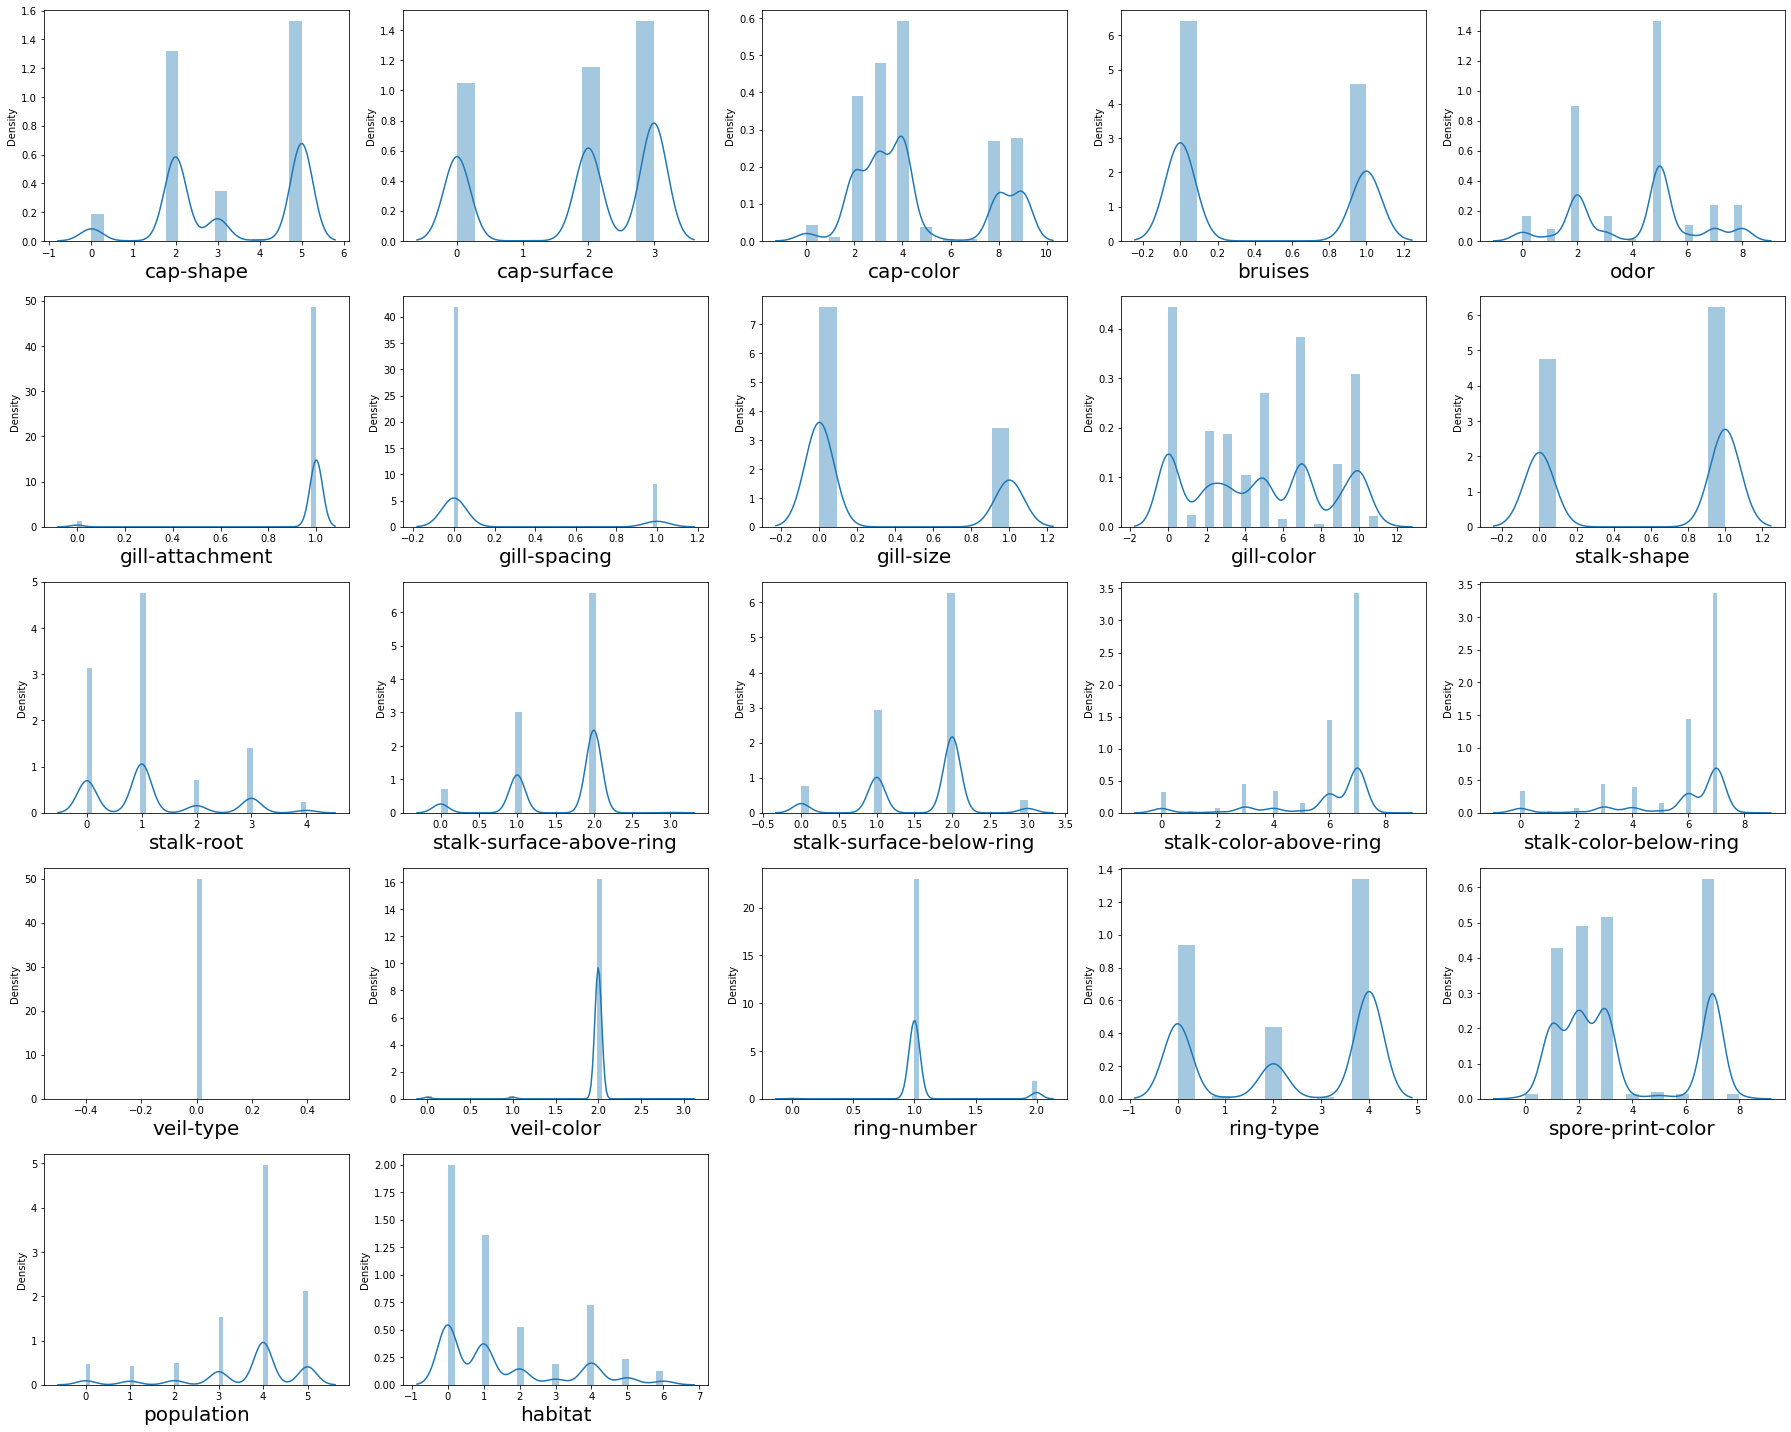

In [11]:
plt.figure(figsize=(25,20), facecolor = 'white')
pltnumber = 1

for column in x:
    if pltnumber<=25:
        ax = plt.subplot(5,5,pltnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.tight_layout()

In [ ]:
Scaling the data

In [14]:
scalar = StandardScaler()
x_sc = scalar.fit_transform(x)

Train test split 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size =0.25,random_state = 138)

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))

Accuracy score 
 0.9542097488921714
Confusion Matrix 
 [[1013   49]
 [  44  925]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1062
           1       0.95      0.95      0.95       969

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))

Accuracy score 
 1.0
Confusion Matrix 
 [[1062    0]
 [   0  969]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1062
           1       1.00      1.00      1.00       969

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [19]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))

Accuracy score 
 1.0
Confusion Matrix 
 [[1062    0]
 [   0  969]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1062
           1       1.00      1.00      1.00       969

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))

Accuracy score 
 1.0
Confusion Matrix 
 [[1062    0]
 [   0  969]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1062
           1       1.00      1.00      1.00       969

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



We are getting high accuracy of 100% for 3 models out of 4 but it can be due to over-fitting and we will check this with cross validation score ie.CV Score.

In [21]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)
print("CV Score of LR :", scr.mean())

CV Score of LR : 0.8391025388404699


In [22]:
scr = cross_val_score(dt,x,y,cv=5)
print("CV Score of dt :", scr.mean())

CV Score of dt : 0.9143002652519894


In [23]:
scr = cross_val_score(sv,x,y,cv=5)
print("CV Score of sv :", scr.mean())

CV Score of sv : 0.841292231906025


In [24]:
scr = cross_val_score(rfc,x,y,cv=5)
print("CV Score of rfc :", scr.mean())

CV Score of rfc : 0.8937387646835923


As per the CV score,Decision tree classifier is having high accuracy and considered as best model. Hyper-parameter tuning to see whether we can increase the model accuracy or not

In [25]:
grid_param = {'criterion' : ['gini', 'entropy'],
             'max_depth': range(10,500,5)}

In [26]:
grid_search = GridSearchCV(dt,param_grid = grid_param,cv=5)

In [27]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 500, 5)})

In [28]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [29]:
ans = DecisionTreeClassifier(criterion = 'gini',max_depth = 10)

ans.fit(x_train,y_train)
pred = ans.predict(x_test)
print("Final accuracy score:DT-" , accuracy_score(y_test,pred)*100)

Final accuracy score:DT- 100.0


Saving the model

In [30]:
import joblib
joblib.dump(ans,"mushroom.pkl")

['mushroom.pkl']